In [3]:
import pandas as pd
import wave
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io.wavfile import read as read_wav
from scipy.io import wavfile
import noisereduce as nr
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt

## Using code from:
https://importchris.medium.com/how-to-create-understand-mel-spectrograms-ff7634991056

In [23]:
#audio_file = 'data/Clips_denoised/gunshots/spectral_gating/ecoguns1.wav'

def plot_mel_spec3 (audio_file):
    signal, sampling_rate = librosa.load(audio_file, sr=None)

    # this is the number of samples in a window per fft: determines the frequency resolution of the spectrogram
    n_fft = 2048
    #n_fft = 3000
    # The amount of samples we are shifting after each fft: determines the frequency resolution of the spectrogram
    hop_length = 512
    #hop_length = 100

    mel_signal = librosa.feature.melspectrogram(y=signal, sr=sampling_rate, hop_length=hop_length,n_fft=n_fft)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(20, 5))
    librosa.display.specshow(power_to_db, sr=sampling_rate, x_axis='time', y_axis='mel', cmap='magma', hop_length=hop_length)
    plt.colorbar(label='dB')
    plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
    plt.xlabel('Time', fontdict=dict(size=15))
    plt.ylabel('Frequency', fontdict=dict(size=15))
    ax = plt.gca()
    ax.set_ylim([0, 4096])
    plt.show()


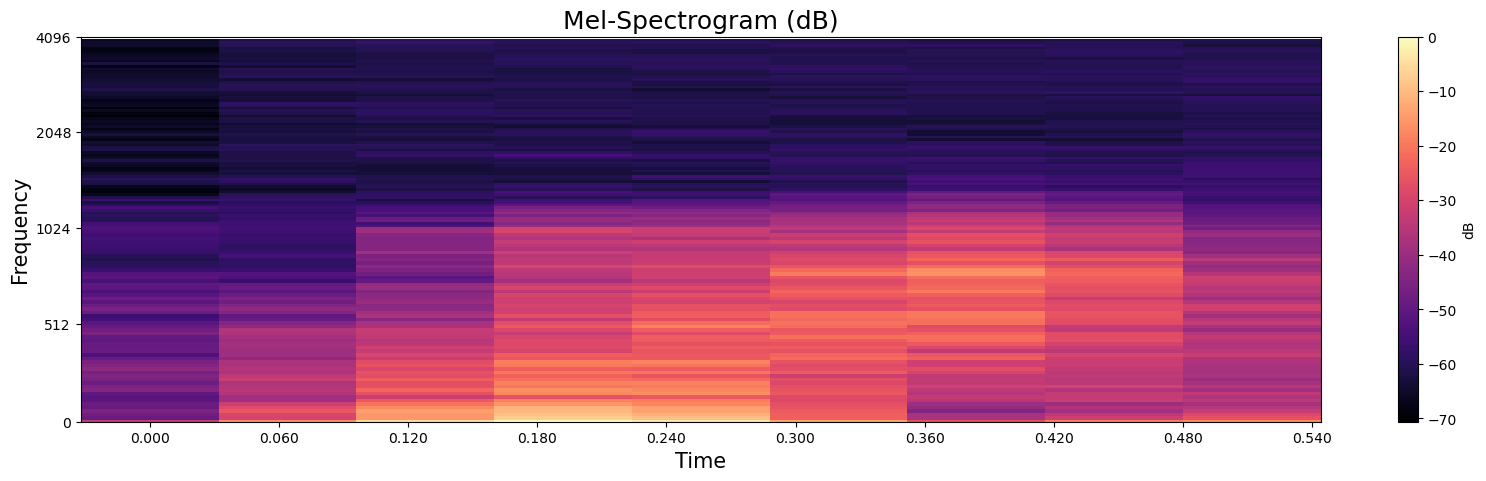

In [24]:
audio_file = 'data/Clips/ecoguns1.wav'
filename = 'data/Clips_denoised/no_gunshots/low_pass/other12.wav'

plot_mel_spec3(filename)

## Same code as before, but calcualting dynamically n_fft and hop_length: found on forum

In [94]:
def plot_mel_spec2(audio_file, destination_file):
    signal, sampling_rate = librosa.load(audio_file, sr=None)

    # calculate duration
    duration = librosa.get_duration(y=signal, sr=sampling_rate)
    n_samples = len(signal)

    # choose the number of frames you would like in the spectrogram
    n_frames = 100 #originally value of 100 but gave me errors. Online it suggested to try 50 or 25

    # number of samples per frame
    samples_per_frame = n_samples / n_frames
    # number of samples that correspond to 25ms
    samples_25ms = int(sampling_rate * 0.025)

    # The amount of samples we are shifting after each fft
    hop_length = int(round(samples_per_frame / 2 / samples_25ms)) * samples_25ms
    if (hop_length==0):
        hop_length = 200
    # this is the number of samples in a window per fft
    n_fft = int(round(2 * hop_length / samples_25ms)) * samples_25ms

    mel_signal = librosa.feature.melspectrogram(y=signal, sr=sampling_rate, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(20, 5))
    librosa.display.specshow(power_to_db, sr=sampling_rate, x_axis='time', y_axis='mel', cmap='magma',hop_length=hop_length)
    plt.colorbar(format="%+2.f dB")
    plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
    plt.xlabel('Time', fontdict=dict(size=15))
    plt.ylabel('Frequency', fontdict=dict(size=15))
    #plt.show()
    plt.savefig(destination_file)




200


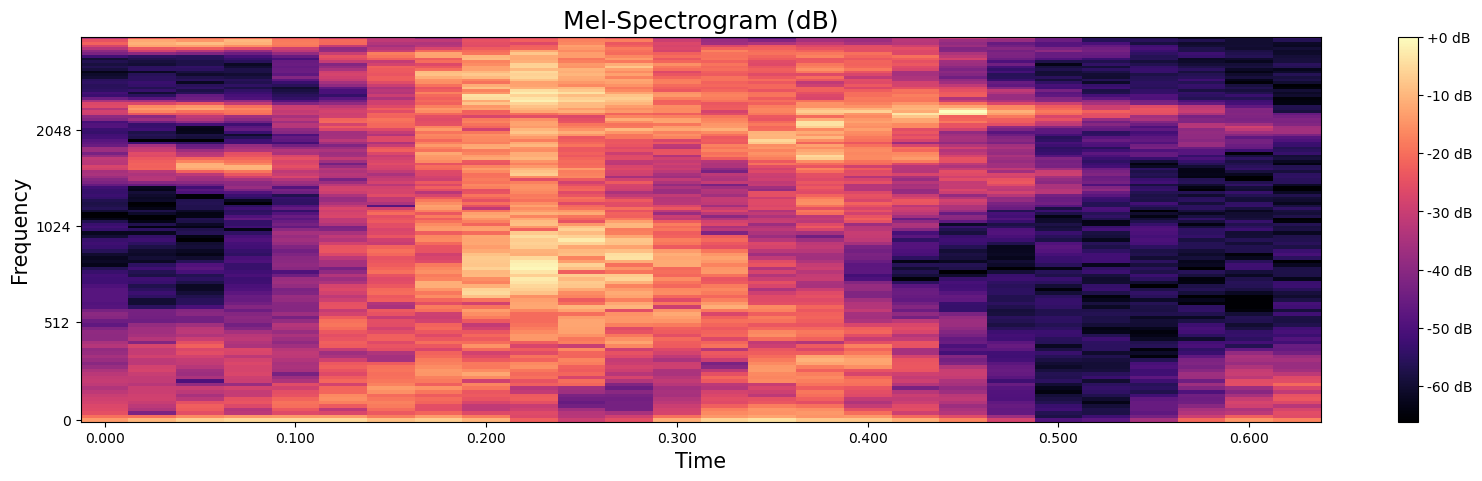

In [92]:
#filename = 'data/Clips_denoised/gunshots/spectral_gating/ecoguns1.wav'
filename = 'data/Clips_denoised/no_gunshots/spectral_gating/other14.wav'
#filename = 'data/Clips_denoised/gunshots/spectral_gating/pnn8.wav'

#audio_file = 'data/Clips/ecoguns1.wav'
plot_mel_spec2(filename, 'test')

## Save plots from denoised audios (from spectral gating)

In [ ]:
for i in range(0,20):
    #ECOGUNS
    file_name = f'data/Clips_denoised/gunshots/spectral_gating/ecoguns{i}.wav'
    destination_file_image = f'data/Images/denoised/gunshots/mel_spectogram_from_spectral/ecoguns{i}.png'
    plot_mel_spec2(file_name, destination_file_image)

    #PNN
    file_name = f'data/Clips_denoised/gunshots/spectral_gating/pnn{i}.wav'
    destination_file_image = f'data/Images/denoised/gunshots/mel_spectogram_from_spectral/pnn{i}.png'
    plot_mel_spec2(file_name, destination_file_image)

    #OTHER: no gunshots
    file_name = f'data/Clips_denoised/no_gunshots/spectral_gating/other{i}.wav'
    destination_file_image = f'data/Images/denoised/no_gunshots/mel_spectogram_from_spectral/other{i}.png'
    plot_mel_spec2(file_name, destination_file_image)


## Save plots from denoised audios (from bandpass)


In [ ]:
for i in range(0,20):
    #ECOGUNS
    file_name = f'data/Clips_denoised/gunshots/band_pass/ecoguns{i}.wav'
    destination_file_image = f'data/Images/denoised/gunshots/mel_spectogram_from_bandpass/ecoguns{i}.png'
    plot_mel_spec2(file_name, destination_file_image)

    #PNN
    file_name = f'data/Clips_denoised/gunshots/band_pass/pnn{i}.wav'
    destination_file_image = f'data/Images/denoised/gunshots/mel_spectogram_from_bandpass/pnn{i}.png'
    plot_mel_spec2(file_name, destination_file_image)

    #OTHER: no gunshots
    file_name = f'data/Clips_denoised/no_gunshots/band_pass/other{i}.wav'
    destination_file_image = f'data/Images/denoised/no_gunshots/mel_spectogram_from_bandpass/other{i}.png'
    plot_mel_spec2(file_name, destination_file_image)


## Code from:
https://librosa.org/doc/main/generated/librosa.display.specshow.html

In [8]:
def plot_mel_spectogram(filename):
    y, sr = librosa.load(filename)

    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax[0])
    ax[0].set(title='Linear-frequency power spectrogram')
    ax[0].label_outer()
    ax[0].set_ylim([0, 4000])


    hop_length = 1024
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                                ref=np.max)
    img = librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                                   x_axis='time', ax=ax[1])
    ax[1].set(title='Log-frequency power spectrogram')
    ax[1].label_outer()
    ax[1].set_ylim([0, 4000])
    fig.colorbar(img, ax=ax, format="%+2.f dB")

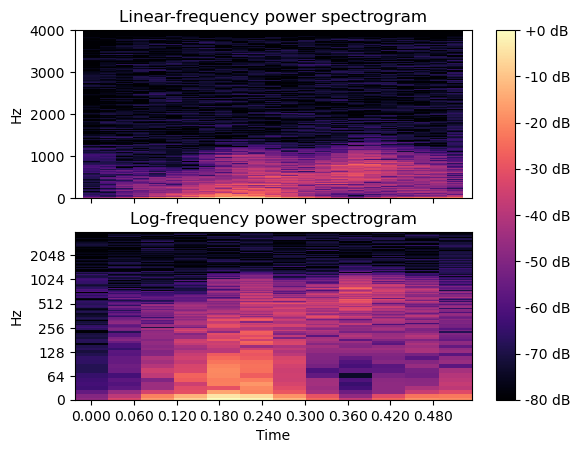

In [46]:
filename = 'data/Clips_denoised/no_gunshots/low_pass/other12.wav'
#filename = 'data/Clips_denoised/gunshots/spectral_gating/ecoguns1.wav'

plot_mel_spectogram(filename)

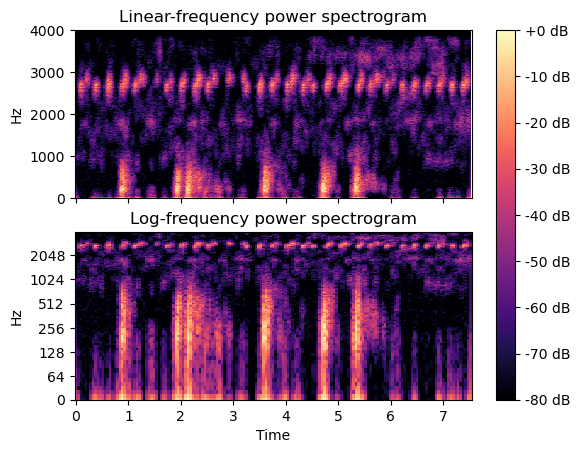

In [97]:
filename = 'data/Clips_denoised/gunshots/spectral_gating/ecoguns178.wav'
plot_mel_spectogram(filename)

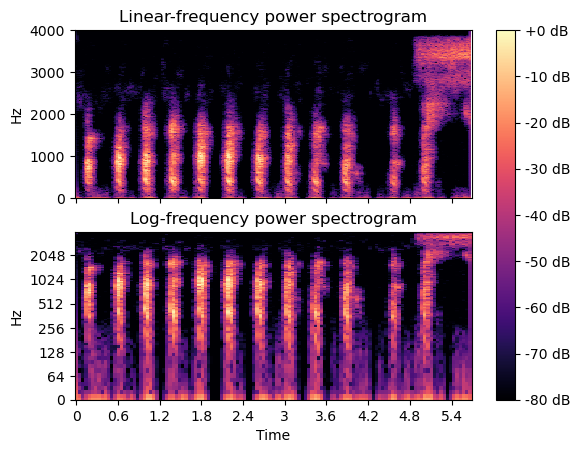

In [101]:
filename = 'data/Clips_denoised/no_gunshots/spectral_gating/other2.wav'
plot_mel_spectogram(filename)